# **Import Python Libraries**

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pathlib

from sklearn.preprocessing import StandardScaler
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import L2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Load the datasets

In [5]:
train_data_dir = pathlib.Path("../input/fer2013/train")
test_data_dir = pathlib.Path("../input/fer2013/test")

# Use Data Augumentation

In [6]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_dataset = train_data_gen.flow_from_directory(
        train_data_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
test_dataset = validation_data_gen.flow_from_directory(
        test_data_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

x_train = next(train_dataset)

Found 28709 images belonging to 7 classes.

Found 7178 images belonging to 7 classes.


Found 28709 files belonging to 7 classes.


2022-11-25 19:44:54.249562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-11-25 19:44:54.344142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-11-25 19:44:54.344975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-11-25 19:44:54.348045: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA

To enable them in other operations, rebuild TensorFlow with the appropriate co

Found 7178 files belonging to 7 classes.


2022-11-25 19:44:58.213853: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


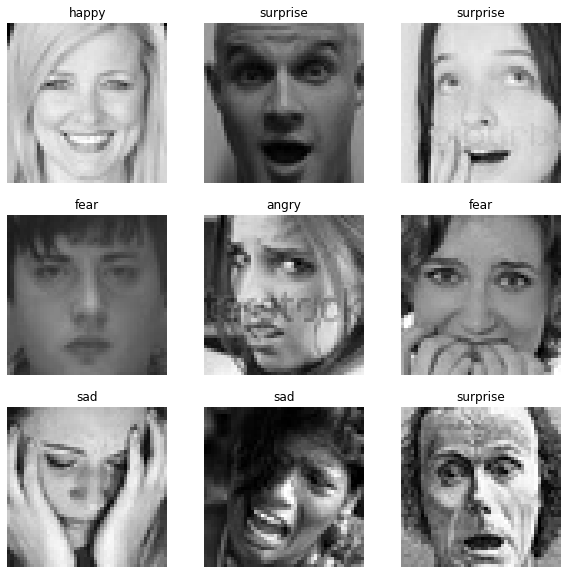

In [7]:
train_dataset_x = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                            shuffle=True,
                                                            batch_size=64,
                                                            image_size=(48,48))

validation_dataset_y = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                                 shuffle=True,
                                                                 batch_size=64,
                                                                 image_size=(48,48))

class_names = train_dataset_x.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset_x.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Building Shallow CNN Model

In [8]:
# create model structure
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(7, activation='softmax')
])

cnn_model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

cnn_model.summary()
# Train the neural network/model
cnn_model_info = cnn_model.fit_generator(
    train_dataset,
    steps_per_epoch=28709 // 64,
    epochs=10,
    validation_data=test_dataset,
    validation_steps=7178 // 64)

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


conv2d (Conv2D)              (None, 46, 46, 32)        320       

_________________________________________________________________

conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     

_________________________________________________________________

max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         

_________________________________________________________________

conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     

_________________________________________________________________

max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    

_________________________________________________________________

max_pooling2d_2 (MaxPooling2 (None, 4, 4

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.

  warnings.warn('`Model.fit_generator` is deprecated and '

2022-11-25 19:45:01.599582: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


448/448 [==============================] - 158s 338ms/step - loss: 1.6485 - accuracy: 0.3379 - val_loss: 1.3870 - val_accuracy: 0.4625

Epoch 2/10

448/448 [==============================] - 40s 90ms/step - loss: 1.3045 - accuracy: 0.5021 - val_loss: 1.2216 - val_accuracy: 0.5314

Epoch 3/10

448/448 [==============================] - 38s 84ms/step - loss: 1.1528 - accuracy: 0.5642 - val_loss: 1.1624 - val_accuracy: 0.5566

Epoch 4/10

448/448 [==============================] - 33s 74ms/step - loss: 1.0418 - accuracy: 0.6045 - val_loss: 1.1275 - val_accuracy: 0.5758

Epoch 5/10

448/448 [==============================] - 32s 71ms/step - loss: 0.9343 - accuracy: 0.6512 - val_loss: 1.1073 - val_accuracy: 0.5823

Epoch 6/10

448/448 [==============================] - 42s 94ms/step - loss: 0.8101 - accuracy: 0.6982 - val_loss: 1.1685 - val_accuracy: 0.5908

Epoch 7/10

448/448 [==============================] - 31s 70ms/step - loss: 0.6755 - accuracy: 0.7501 - val_loss: 1.2089 - val_accura

# **Visualizing the Performance**

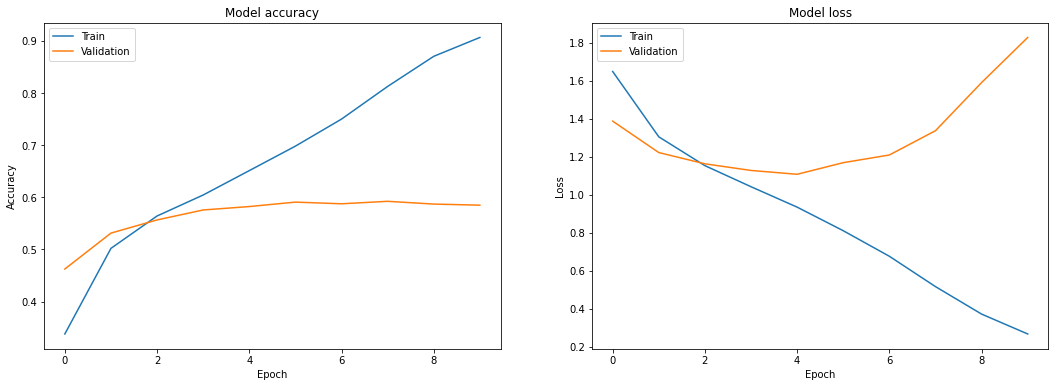

In [9]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(cnn_model_info.history['accuracy'])
axes[0].plot(cnn_model_info.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(cnn_model_info.history['loss'])
axes[1].plot(cnn_model_info.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Improved CNN Model**

In [10]:
# create model structure
improved_cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

improved_cnn_model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

improved_cnn_model.summary()

# to be applied during training
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, 
    patience=10, verbose=0, mode='auto', 
    min_delta=0.0001, cooldown=0, min_lr=0)
early_stop = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, 
    verbose=0, mode='auto')

# Train the neural network/model
improved_cnn_model_info = improved_cnn_model.fit_generator(
    train_dataset,
    steps_per_epoch=28709 // 64,
    epochs=10,
    validation_data=test_dataset,
    validation_steps=7178 // 64,
    callbacks=[reduce_lr])


Model: "sequential_1"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


conv2d_4 (Conv2D)            (None, 46, 46, 32)        320       

_________________________________________________________________

conv2d_5 (Conv2D)            (None, 44, 44, 64)        18496     

_________________________________________________________________

max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         

_________________________________________________________________

dropout (Dropout)            (None, 22, 22, 64)        0         

_________________________________________________________________

conv2d_6 (Conv2D)            (None, 20, 20, 128)       73856     

_________________________________________________________________

max_pooling2d_4 (MaxPooling2 (None, 10, 10, 128)       0         

_________________________________________________________________

conv2d_7 (Conv2D)            (None, 8,

# **Visualizing Traing Performance**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


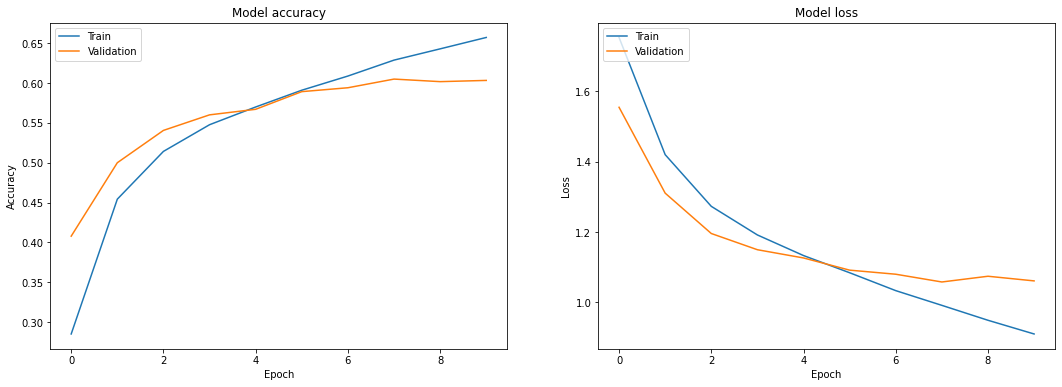

In [11]:
print(improved_cnn_model_info.history.keys())

fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(improved_cnn_model_info.history['accuracy'])
axes[0].plot(improved_cnn_model_info.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(improved_cnn_model_info.history['loss'])
axes[1].plot(improved_cnn_model_info.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Saving the model**

In [12]:
cnn_model.save('facial_emotions_model.h5')

improved_cnn_model.save('facial_emotions_model_improved.h5')

# **Predict the image**

(48, 48, 1)


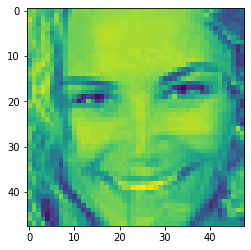

In [17]:
from tensorflow.keras.preprocessing import image
img_path='../input/fer2013/test/happy/PrivateTest_10077120.jpg'
test_image=image.load_img(img_path,target_size=(48,48),color_mode='grayscale')
test_image=image.img_to_array(test_image)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

In [18]:
test_image=test_image.reshape(1,48,48,1)
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
result=improved_cnn_model.predict(test_image)
print(result[0])
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])

[0. 0. 0. 1. 0. 0. 0.]

The person facial emotion is: Happy


# Adding Additional Convolution  Layers - Deep CNN Model

In [26]:

np.random.seed(1)
tf.random.set_seed(1)
num_classes = 7

addition_cnn_model = Sequential([
    #1st
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    #2nd
    Conv2D(128, (5,5), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (5,5), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (5,5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    
   #3rd
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    #4th
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),
    Flatten(),
    
    #Dense
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

addition_cnn_model.summary()


addition_cnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

addition_cnn_model.summary()
# Train the neural network/model
addition_cnn_model_info = addition_cnn_model.fit_generator(
    train_dataset,
    steps_per_epoch=28709 // 64,
    epochs=10,
    validation_data=test_dataset,
    validation_steps=7178 // 64,
    callbacks=[reduce_lr])


Model: "sequential_8"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


conv2d_70 (Conv2D)           (None, 48, 48, 64)        640       

_________________________________________________________________

batch_normalization_71 (Batc (None, 48, 48, 64)        256       

_________________________________________________________________

conv2d_71 (Conv2D)           (None, 48, 48, 64)        36928     

_________________________________________________________________

batch_normalization_72 (Batc (None, 48, 48, 64)        256       

_________________________________________________________________

max_pooling2d_30 (MaxPooling (None, 24, 24, 64)        0         

_________________________________________________________________

dropout_37 (Dropout)         (None, 24, 24, 64)        0         

_________________________________________________________________

conv2d_72 (Conv2D)           (None, 24

# Visualizing Performance

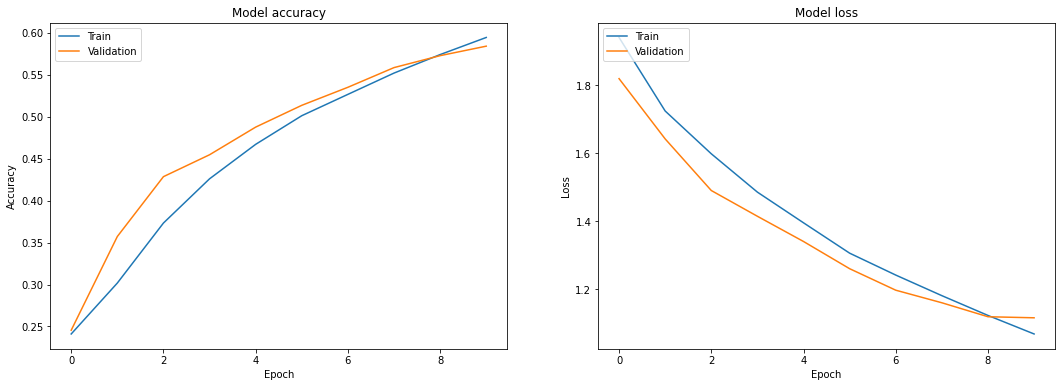

In [27]:

fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(addition_cnn_model_info.history['accuracy'])
axes[0].plot(addition_cnn_model_info.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(addition_cnn_model_info.history['loss'])
axes[1].plot(addition_cnn_model_info.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()